In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def knn(X, k):
    """
    Calculate k-nearest neighbors for each point in the dataset.
    :param X: Matrix representing the dataset, with each row representing a data point.
    :param k: Value of k in the k-nearest neighbors algorithm.
    :return: Similarity matrix.
    """
    # Calculate the distance matrix.
    dists = np.sum(X**2, axis=1, keepdims=True) + np.sum(X**2, axis=1, keepdims=True).T - 2*np.dot(X, X.T)
    
    # Find the indices of the k nearest neighbors.
    indices = np.argsort(dists, axis=1)[:, 1:k+1]
    
    # Create the similarity matrix.
    S = np.zeros_like(dists)
    for i, row in enumerate(indices):
        S[i, row] = 1
    S = S + S.T
    np.fill_diagonal(S, 1)
    return S


def spectral_embedding_knn(X, n_components=2, n_neighbors=16):
    """
    Calculate the spectral embedding results using the k-nearest neighbors algorithm.
    :param X: Matrix representing the dataset, with each row representing a data point.
    :param n_components: Number of dimensions for the embedding.
    :param n_neighbors: Value of k in the k-nearest neighbors algorithm.
    :return: Embedding results.
    """
    # Calculate the similarity matrix using the k-nearest neighbors algorithm.
    A = knn(X, n_neighbors)

    # Calculate the degree matrix.
    D = np.diag(A.sum(axis=1))

    # Calculate the Laplacian matrix.
    L = D - A

    # Calculate the eigenvalues and eigenvectors.
    vals, vecs = np.linalg.eig(L)

    # Sort the eigenvalues.
    idx = np.argsort(vals)[:n_components]

    # Select the smallest k eigenvectors.
    emb = vecs[:, idx]

    # Normalize the eigenvectors.
    emb = emb / np.linalg.norm(emb, axis=1)[:, None]

    return emb


In [5]:
class KMeans:
    def __init__(self, n_clusters=2, random_state=None, max_iter=100):
        """
        Initialize KMeans object with n_clusters, random_state, and max_iter.
        """
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None
        self.inertia = None
        self.objective_func = []

    def fit(self, X):
        """
        Fit KMeans object to the data X.
        """
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters)]
        prev_labels = None
        for i in range(self.max_iter):
            # Assign each data point to the nearest centroid
            self.labels = self._assign_labels(X, self.centroids)
            # Update the centroids based on the new assignments
            self.centroids = self._update_centroids(X, self.labels, self.n_clusters)
            # Check if the labels have changed since the last iteration
            if np.array_equal(prev_labels, self.labels):
                break
            prev_labels = self.labels
            # Compute the inertia (sum of squared distances of samples to their closest cluster center)
            self.inertia = self._compute_inertia(X, self.labels, self.centroids)
            # Add the current objective function value to the list
            self.objective_func.append(self.inertia)
        
    def predict(self, X):
        """
        Predict the cluster labels for new data X.
        """
        return self._assign_labels(X, self.centroids)

    @staticmethod
    def _assign_labels(X, centroids):
        """
        Assign each data point to the nearest centroid.
        """
        distances = np.sqrt(np.sum((X - centroids[:, np.newaxis])**2, axis=2))
        return np.argmin(distances, axis=0)

    @staticmethod
    def _update_centroids(X, labels, n_clusters):
        """
        Update the centroids based on the new assignments.
        """
        centroids = np.zeros((n_clusters, X.shape[1]))
        for k in range(n_clusters):
            centroids[k] = np.mean(X[labels == k], axis=0)
        return centroids

    @staticmethod
    def _compute_inertia(X, labels, centroids):
        """
        Compute the inertia (sum of squared distances of samples to their closest cluster center).
        """
        inertia = 0
        for k in range(centroids.shape[0]):
            inertia += np.sum((X[labels == k] - centroids[k])**2)
        return inertia

In [6]:
data = pd.read_csv("data.csv")

In [7]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [8]:
#One-Hot codeing for string in column diagnosis
data.replace({"diagnosis": {"M": 0, "B": 1}}, inplace=True)

[51.88658506018194, 45.995694443075294, 44.828648333700116]


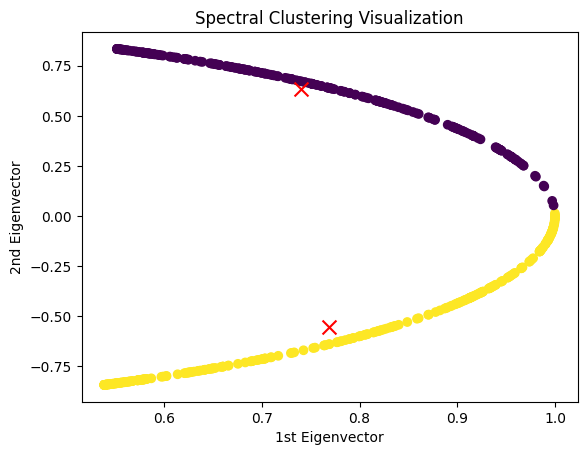

In [9]:
#Step by Step for Kmeans_Spectral_Clustering
X = data.values[:,2:-1]
Y = data.values[:,1]
k=3
n_components=2
n_neighbors=16
max_iter=100
# Transform the data using spectral embedding with k-nearest neighbors
X = spectral_embedding_knn(X,n_components=n_components, n_neighbors=n_neighbors)

# Fit a K-means model to the transformed data
kmeans = KMeans()
kmeans.fit(X)

# Store the cluster labels
labels = kmeans.predict(X)
centroids = kmeans.centroids
print(kmeans.objective_func)
#visualization 
plt.scatter(X[:, 0], X[:, 1], c = labels, marker='o')
plt.scatter(centroids[:,0], centroids[:, 1], c='red', marker='x', s=100)
plt.xlabel("1st Eigenvector")
plt.ylabel("2nd Eigenvector")
plt.title("Spectral Clustering Visualization")
plt.show()

X = data.values
X

In [10]:
#Encapsulate spectral clustering into a function for easy calling
class Kmeans_Spectral_Clustering:
    def __init__(self, k=3,  n_components=2, n_neighbors=16, max_iter=100):
        """
        Initialize the Kmeans Spectral Clustering model.

        Parameters:
        k (int): The number of clusters to form.
        n_components, n_neighbors: KNN parameters
        max_iter (int): The maximum number of iterations to run the K-means algorithm.

        """
        self.k = k
        self.max_iter = max_iter
        self.n_components = n_components
        self.n_neighbors = n_neighbors
        
    def fit(self, X):
        """
        Fit the model to the data.
        Parameters:
        X (numpy array): The data to cluster.
        """
        # Transform the data using spectral embedding with k-nearest neighbors
        X = spectral_embedding_knn(X,n_components=self.n_components, n_neighbors=self.n_neighbors)
        
        # Fit a K-means model to the transformed data
        kmeans = KMeans()
        kmeans.fit(X)
        
        # Store the cluster labels
        self.labels = kmeans.predict(X)
        self.centroids = kmeans.centroids

In [11]:
# Compute the Silhouette Coefficient
def silhouette_score(X, labels):
    # Get the number of samples and features
    n_samples, _ = X.shape
    # Compute the number of clusters in the labels
    n_clusters = len(np.unique(labels))

    # If there is only one cluster, return -1
    if n_clusters <= 1:
        return -1

    # Initialize arrays to store average dissimilarities
    a = np.zeros(n_samples)
    b = np.zeros(n_samples)

    # Compute a and b for each sample
    for i in range(n_samples):
        cluster_i = labels[i]
        # Compute the average dissimilarity of i to other samples in its cluster
        a[i] = np.mean([np.linalg.norm(X[i] - X[j])
                       for j in range(n_samples)
                       if labels[j] == cluster_i and i != j])
        # Compute the minimum average dissimilarity of i to any other cluster
        b[i] = np.min([np.mean([np.linalg.norm(X[i] - X[j])
                                for j in range(n_samples)
                                if labels[j] != cluster_i])
                      for c in range(n_clusters) if c != cluster_i])

    # Compute the Silhouette Coefficient for each sample
    silhouette = (b - a) / (np.maximum(a, b) + 1e-10)
    # Compute the mean Silhouette Coefficient over all samples
    return np.mean(silhouette)


In [12]:
# Compute the Normalized Mutual Information (NMI)
import numpy as np

def NMI(labels_true, labels_pred):
    # Get the unique classes and clusters in the labels
    classes = np.unique(labels_true)
    clusters = np.unique(labels_pred)
    # Compute the number of classes and clusters
    n_classes = classes.shape[0]
    n_clusters = clusters.shape[0]

    # Create a matrix to store the number of samples in each class and cluster
    class_cluster_matrix = np.zeros((n_classes, n_clusters))
    for i, c in enumerate(classes):
        for j, cl in enumerate(clusters):
            class_cluster_matrix[i, j] = np.sum((labels_true == c) & (labels_pred == cl))

    # Compute the probability of each class and cluster
    class_probabilities = class_cluster_matrix.sum(axis=1) / class_cluster_matrix.sum()
    cluster_probabilities = class_cluster_matrix.sum(axis=0) / class_cluster_matrix.sum()

    # Compute the entropy of the classes, clusters, and joint distribution
    class_entropy = -np.sum(class_probabilities * np.log2(class_probabilities))
    cluster_entropy = -np.sum(cluster_probabilities * np.log2(cluster_probabilities))
    joint_entropy = 0
    for i in range(n_classes):
        for j in range(n_clusters):
            p = class_cluster_matrix[i, j] / class_cluster_matrix.sum()
            if p > 0:
                joint_entropy += p * np.log2(p / (class_probabilities[i] * cluster_probabilities[j]))

    # Compute the NMI as the normalized mutual information of the classes and clusters
    NMI = 2 * joint_entropy / (class_entropy + cluster_entropy)

    return NMI


In [13]:
#10-Flod Cross-Validation
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
nmi_scores = []
silhouette_scores = []

nmi_scores_kmean = []
silhouette_scores_kmean = []

for train_idx, test_idx in kfold.split(X):
    # Split
    X_train, X_test = X[train_idx], X[test_idx]

    # Train Kmeans_Spectral_Clustering
    sc = Kmeans_Spectral_Clustering(k=2)
    sc.fit(X_train)
    
    # evaluate Kmeans_Spectral_Clustering
    Y_pred = sc.labels
    nmi_scores.append(NMI(Y[train_idx], Y_pred))
    silhouette_scores.append(silhouette_score(X_train, Y_pred))
    
    
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(X_train)
    labels_kmean = kmeans.predict(X_train)
    nmi_scores_kmean.append(NMI(Y[train_idx], labels_kmean))
    silhouette_scores_kmean.append(silhouette_score(X_train, labels_kmean))
    

C:\Users\chaiy\AppData\Local\Temp\ipykernel_32548\3095658048.py:56: ComplexWarning: Casting complex values to real discards the imaginary part
  centroids[k] = np.mean(X[labels == k], axis=0)


In [14]:
# calculate overall NMI and silhouette scores
nmi_mean_kmean = np.mean(nmi_scores_kmean)
nmi_std_kmean = np.std(nmi_scores_kmean)
silhouette_mean_kmean = np.mean(silhouette_scores_kmean)
silhouette_std_kmean = np.std(silhouette_scores_kmean)
means = [nmi_mean_kmean,silhouette_mean_kmean]
stds = [nmi_std_kmean ,silhouette_std_kmean]
print(means)
print(stds)

[0.419906832396218, 0.7150191492973245]
[0.008022793508530633, 0.0025889956253968096]


In [15]:
# calculate overall NMI and silhouette scores
nmi_mean = np.mean(nmi_scores)
nmi_std= np.std(nmi_scores)
silhouette_mean = np.mean(silhouette_scores)
silhouette_std = np.std(silhouette_scores)
means = [nmi_mean,silhouette_mean]
stds = [nmi_std,silhouette_std]
print(means)
print(stds)

[0.4137652992749348, 0.7151595281938825]
[0.00799965564601704, 0.002379708194467774]


[0.4137652992749348, 0.7151595281938825]
[0.00799965564601704, 0.002379708194467774]


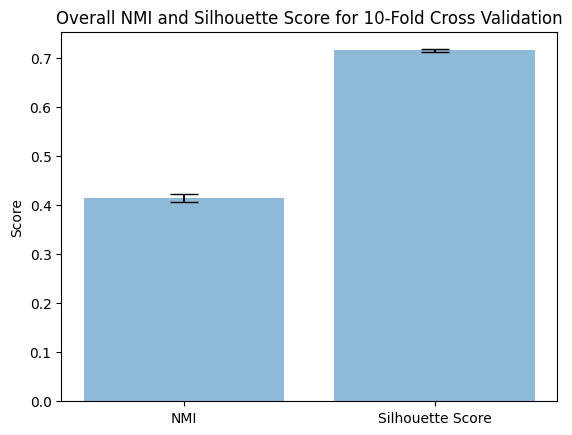

In [22]:
# calculate overall NMI and silhouette scores
nmi_mean = np.mean(nmi_scores)
nmi_std = np.std(nmi_scores)
silhouette_mean = np.mean(silhouette_scores)
silhouette_std = np.std(silhouette_scores)

# plot NMI and silhouette scores
means = [nmi_mean,silhouette_mean]
stds = [nmi_std,silhouette_std]
print(means)
print(stds)

x_pos = ['NMI','Silhouette Score']
#Visualization
plt.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylabel('Score')
plt.title('Overall NMI and Silhouette Score for 10-Fold Cross Validation')

plt.show()

In [23]:
data = pd.read_csv("implementation_correctness_dataset.csv")
data

,Feature 1,Feature 2,Class/Cluster
0,0.020,0.000000,1
1,1.045,0.000000,1
2,2.080,0.000000,1
3,3.125,0.000000,1
4,4.180,0.000000,1
5,5.245,0.000000,1
6,6.320,0.000000,1
7,7.405,0.000000,1
8,8.500,0.000000,1
9,9.605,0.000000,1


In [24]:
#correctioness
data = pd.read_csv("implementation_correctness_dataset.csv")
#Step by Step for Kmeans_Spectral_Clustering
X = data.values[:,:2]
#hyper-parameters
k=3
n_components=2
n_neighbors=10
max_iter=100
# Transform the data using spectral embedding with k-nearest neighbors
X = spectral_embedding_knn(X,n_components=n_components, n_neighbors=n_neighbors)
X

array([[ 0.73121772, -0.68214415],
       [ 0.82105689, -0.57084638],
       [ 0.98628014, -0.16508022],
       [ 0.99872771, -0.05042784],
       [ 0.93661662,  0.35035598],
       [ 0.78444938,  0.62019286],
       [ 0.60921766,  0.79300305],
       [ 0.56858725,  0.82262296],
       [ 0.53582777,  0.8443273 ],
       [ 0.5108038 ,  0.85969732],
       [ 0.70647569, -0.70773731],
       [ 0.681711  , -0.73162156],
       [ 0.65723577, -0.75368505],
       [ 0.56517265, -0.82497265],
       [ 0.98454139, -0.1751521 ],
       [ 0.98454139, -0.1751521 ],
       [ 0.9607742 , -0.2773318 ]])

[6.299789442967471, 2.854384189591694, 2.666949187430021, 1.8486817918926608, 1.4687931171265938]


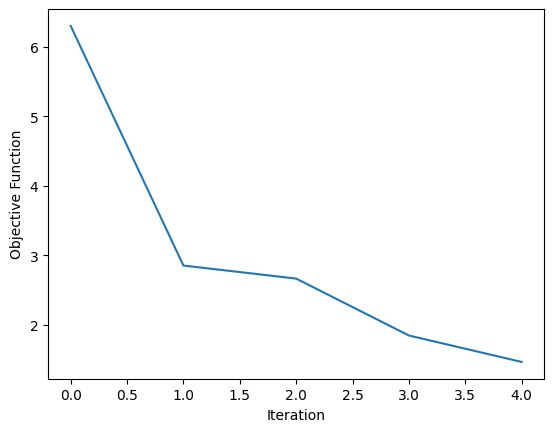

In [26]:
# Fit a K-means model to the transformed data
kmeans = KMeans(n_clusters=2, max_iter=100)
kmeans.fit(X)
print(kmeans.objective_func)
#plot the objective function
plt.plot(kmeans.objective_func)
plt.xlabel("Iteration")
plt.ylabel("Objective Function")
plt.show()


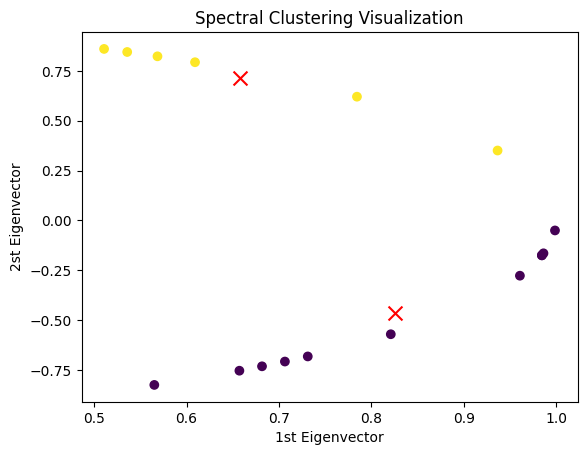

In [21]:
# Store the cluster labels
labels = kmeans.predict(X)
centroids = kmeans.centroids
#visualization 
plt.scatter(X[:, 0], X[:, 1], c = labels, marker='o')
plt.scatter(centroids[:,0], centroids[:, 1], c='red', marker='x', s=100)
plt.xlabel("1st Eigenvector")
plt.ylabel("2st Eigenvector")
plt.title("Spectral Clustering Visualization")
plt.show()